<a href="https://colab.research.google.com/github/Laxmikurapati/Machine-learning-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Credit Card Faurd Detection**




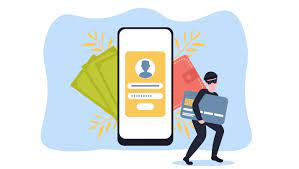


**Dataset link**: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from sklearn import metrics 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

We got no categorical Values, so we can continue without any onehot encoding or label encoding

In [7]:
data.shape

(5974, 31)

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
data['Class'].value_counts()

0.0    5970
1.0       3
Name: Class, dtype: int64

Fraud Cases: 3
Valid Transactions: 5970


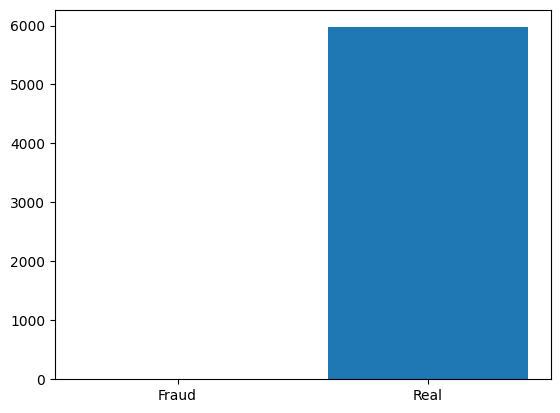

In [20]:
label_size = [data['Class'].sum(), len(data['Class'])- data['Class'].sum()]
plt.bar(['Fraud','Real'],label_size)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 


From the above analysis we can say that the dataset is imbalance so we got to balance the dataset


In [25]:
X=data.drop('Class',axis=1)
y=data['Class']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [29]:
print(X_train.shape)
print(y_train.shape)


(4778, 30)
(4778,)


# **Building ANN Model in tenserflow/Keras**

In [22]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00


In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=30, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [32]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
150/150 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9985
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9996
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9996
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9990
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9996
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9996
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9994
Epoch 8/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9996
Epoch 9/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9994
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0128 - accura

Confusion matrix:
 [[1194    0]
 [   1    0]]


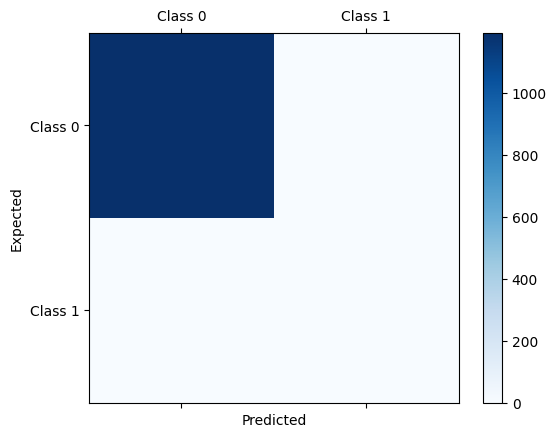

In [33]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# **Mitigating Skewdness of Data**

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

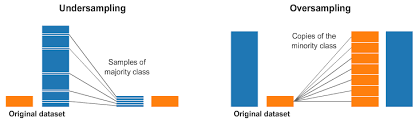



Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

#**Method-1 : Under Sampling**

In [40]:
# Class count
count_class_0, count_class_1 = data.Class.value_counts()

# Divide by class
df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]
print("Number of Safe transactions: ",len(df_class_0))
print("Number of fraud transactions: ",len(df_class_1))

Number of Safe transactions:  5970
Number of fraud transactions:  3


In [41]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
0.0    3
1.0    3
Name: Class, dtype: int64


There is no use of performing undersampling as the data is very sample contaning only 3 samples 

# **Method- 2: Oversampling**

In [42]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
0.0    5970
1.0    5970
Name: Class, dtype: int64


In [43]:
X = df_test_over.drop('Class',axis='columns')
y = df_test_over['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [44]:
# Number of classes in training Data
y_train.value_counts()

1.0    4776
0.0    4776
Name: Class, dtype: int64

In [45]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
299/299 [==============================] - 2s 3ms/step - loss: 4.4590 - accuracy: 0.8785
Epoch 2/100
299/299 [==============================] - 1s 4ms/step - loss: 0.0828 - accuracy: 0.9890
Epoch 3/100
299/299 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.9897
Epoch 4/100
299/299 [==============================] - 2s 7ms/step - loss: 0.0166 - accuracy: 0.9982
Epoch 5/100
299/299 [==============================] - 1s 5ms/step - loss: 0.0116 - accuracy: 0.9990
Epoch 6/100
299/299 [==============================] - 1s 4ms/step - loss: 0.0059 - accuracy: 0.9995
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 0.0158 - accuracy: 0.9972
Epoch 8/100
299/299 [==============================] - 1s 4ms/step - loss: 0.0056 - accuracy: 0.9994
Epoch 9/100
299/299 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9997
Epoch 10/100
299/299 [==============================] - 1s 3ms/step - loss: 0.0033 - accura

#**Method-3: SMOTE**

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [46]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE(k_neighbors=2,sampling_strategy='minority').fit_resample(X,y)

y_sm.value_counts()

0.0    5970
1.0    5970
Name: Class, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [62]:
# Number of classes in training Data
y_train.value_counts()

1.0    4776
0.0    4776
Name: Class, dtype: int64

In [63]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
299/299 [==============================] - 1s 2ms/step - loss: 3.3609 - accuracy: 0.8424
Epoch 2/100
299/299 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9719
Epoch 3/100
299/299 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9693
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9981
Epoch 5/100
299/299 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9984
Epoch 6/100
299/299 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.9982
Epoch 7/100
299/299 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9986
Epoch 8/100
299/299 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.9984
Epoch 9/100
299/299 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9785
Epoch 10/100
299/299 [==============================] - 1s 2ms/step - loss: 0.0073 - accura

# **Method-4: Use of Ensemble with undersampling**

In [65]:
data.Class.value_counts()

0.0    5970
1.0       3
Name: Class, dtype: int64

In [67]:
X=data.drop('Class',axis=1)
y=data['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()

0.0    4776
1.0       2
Name: Class, dtype: int64

Here as the y dataset is too small if we divide the x in ratio of y then we have create total 2000 predictions and then combine then all , so because of this the method of ensaemble with undersampling is not preferred over here


So to conclude we can see that for the **credit card prediction model** to handle the skewdness (imbalance) data we can use **Oversampling** or **Smote method** and then use **ANN model** for classification 